In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./files/USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [47]:
x = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3) 

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lr_model = LinearRegression()

In [52]:
lr_model.fit(x_train, y_train)

LinearRegression()

In [53]:
lr_model.intercept_

-2643044.741052852

In [54]:
lr_model.coef_

array([2.14992946e+01, 1.66507325e+05, 1.21746208e+05, 1.10397120e+03,
       1.52241924e+01])

In [55]:
prediction = lr_model.predict(x_test)

In [56]:
prediction

array([ 522905.23172469, 1351622.78143806, 1492590.57042731, ...,
        266632.77228232, 1644575.52327119, 1326074.05342338])

In [57]:
from sklearn import metrics

In [58]:
print('MSE:',metrics.mean_squared_error(y_test, prediction))   # 손실함수

MSE: 10367419802.478724


In [59]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, prediction))) # 평균제곱근오차

RMSE: 101820.52741210253


In [60]:
print('MAE:',metrics.mean_absolute_error(y_test,prediction)) # 평균 절대 오차

MAE: 81637.66391422125


In [61]:
metrics.r2_score(y_test,prediction)

0.9185269387570872

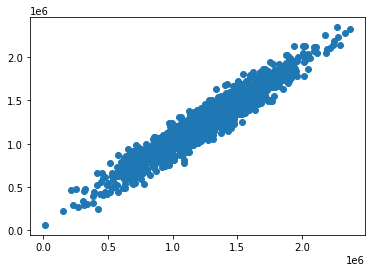

In [62]:
plt.scatter(y_test, prediction)